# Station Correlation
Cascade Tuholske Fall 2023  

Notebook to look at the correlation between WBGT (transformed from [heat index](https://www.tandfonline.com/doi/abs/10.1080/15459624.2014.989365?casa_token=-ugo2PuhvWIAAAAA:bGNuh0O3R8IV4w8QWdTiGi5z93R23MtkREIA24L07HEMahHTqulTfhXH0kcJVgwoHLahrdib6cAxCA), maximum air temperatures, and relative humidity for select ISD USA stations, ERA-5, and PRISM. Date range is daily observations, May - Sep, 2015-2020.

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import glob
import pandas as pd
import geopandas as gpd
import scipy as sp

# ISD Data

## Correlations - All Data + Tmax > 30C

In [121]:
fn_nm = os.path.join('../../../data/cascade/mergeddat_2015-2020.csv')

In [122]:
# open and look
df = pd.read_csv(fn_nm)
print(len(df))
df.head()

532440


,Unnamed: 0,lat,lon,date,ERA5_Tmax,ERA5_RHmin,ERA5_HI,ERA5_Bernard,PRISM_Tmax,PRISM_RHmin,PRISM_HI,PRISM_Bernard,STN_Tmax,STN_RHmin,STN_HI,STN_Bernard
0,1,25.483,-80.383,2015-05-01,27.85,39.350863,30.544188,23.778031,27.469999,61.929372,28.87,22.637933,28.7,36.0,31.015535,24.088830
1,2,25.483,-80.383,2015-05-02,26.34,49.606030,31.265227,24.251381,29.006001,36.969844,28.36,22.273219,26.7,53.2,31.494090,24.398285
2,3,25.483,-80.383,2015-05-03,27.27,43.227241,30.428548,23.700488,26.916000,53.344447,27.54,21.684739,26.3,48.9,30.035973,23.436100
3,4,25.483,-80.383,2015-05-04,26.53,48.822887,30.449514,23.715281,26.589001,49.113207,26.58,20.977524,25.5,53.7,29.676142,23.194840
4,5,25.483,-80.383,2015-05-05,25.94,60.170848,32.676771,25.143074,25.746000,58.083349,25.89,20.455191,25.9,68.8,33.111781,25.408096


In [124]:
# All data pair-wise  stations, ERA5 & PRISM
handle = 'Bernard' #Tmax & RHmin 
data = df[['date','STN_'+handle,'ERA5_'+handle,'PRISM_'+handle]]
out = ''
print(len(data))


# for days Tmax stations > 30
# print(len(df))
# data = df[df['STN_Tmax'] > 26]
# print(len(data))
# out = '_26'

# handle = 'Bernard' #Tmax & RHmin & Bernard
# data = data[['date','STN_'+handle,'ERA5_'+handle,'PRISM_'+handle]]


532440


In [125]:
# drop nans
print(len(data[data.isna().any(axis=1)]))
data = data.dropna()

2793


In [126]:
# make lists
years = [str(x) for x in list(range(2015,2020+1,1))]
months = ['0'+str(x) for x in list(range(5,9+1,1))]

In [127]:
date_lst = []
STN_ERA_lst = []
STN_PRISM_lst = []
PRISM_ERA_lst = []

for year in years:
    for month in months:
        sub_set = data[data['date'].str.contains(year+'-'+month)]
        
        date = year+'-'+month
        date_lst.append(date)
        print(year, month)

        x = sub_set['STN_'+handle]
        y = sub_set['ERA5_'+handle]

        r, p = sp.stats.pearsonr(x, y)
        #print('STN-ERA', 'r:', r, 'p:', p)
        STN_ERA_lst.append(r)

        x = sub_set['STN_'+handle]
        y = sub_set['PRISM_'+handle]

        r, p = sp.stats.pearsonr(x, y)
        #print('STN-PRISM', 'r:', r, 'p:', p)
        STN_PRISM_lst.append(r)

        x = sub_set['PRISM_'+handle]
        y = sub_set['ERA5_'+handle]

        r, p = sp.stats.pearsonr(x, y)
        #print('PRISM-ERA5', 'r:', r, 'p:', p)
        PRISM_ERA_lst.append(r)

2015 05
2015 06
2015 07
2015 08
2015 09
2016 05
2016 06
2016 07
2016 08
2016 09
2017 05
2017 06
2017 07
2017 08
2017 09
2018 05
2018 06
2018 07
2018 08
2018 09
2019 05
2019 06
2019 07
2019 08
2019 09
2020 05
2020 06
2020 07
2020 08
2020 09


In [128]:
out_df = pd.DataFrame()
out_df['Date'] = date_lst
out_df['Station-ERA5-'+handle] = STN_ERA_lst
out_df['Station-PRISM-'+handle] = STN_PRISM_lst
out_df['PRISM-ERA5-'+handle] = PRISM_ERA_lst

In [129]:
out_df.head()

,Date,Station-ERA5-Bernard,Station-PRISM-Bernard,PRISM-ERA5-Bernard
0,2015-05,0.959535,0.843715,0.860790
1,2015-06,0.950572,0.841153,0.847385
2,2015-07,0.940480,0.844655,0.852036
3,2015-08,0.940450,0.831970,0.847296
4,2015-09,0.956157,0.851515,0.866795


In [130]:
fn_out = os.path.join('../../../data/cascade/Station-ERA5-PRISM-'+handle+'-Corr'+out+'.csv')
out_df.to_csv(os.path.join(fn_out), index = False)

## Plot

In [132]:
out = ''

In [133]:
rhmin = pd.read_csv(os.path.join('../../../data/cascade/Station-ERA5-PRISM-RHmin-Corr'+out+'.csv'))
tmax = pd.read_csv(os.path.join('../../../data/cascade/Station-ERA5-PRISM-Tmax-Corr'+out+'.csv'))
bernard = pd.read_csv(os.path.join('../../../data/cascade/Station-ERA5-PRISM-Bernard-Corr'+out+'.csv'))

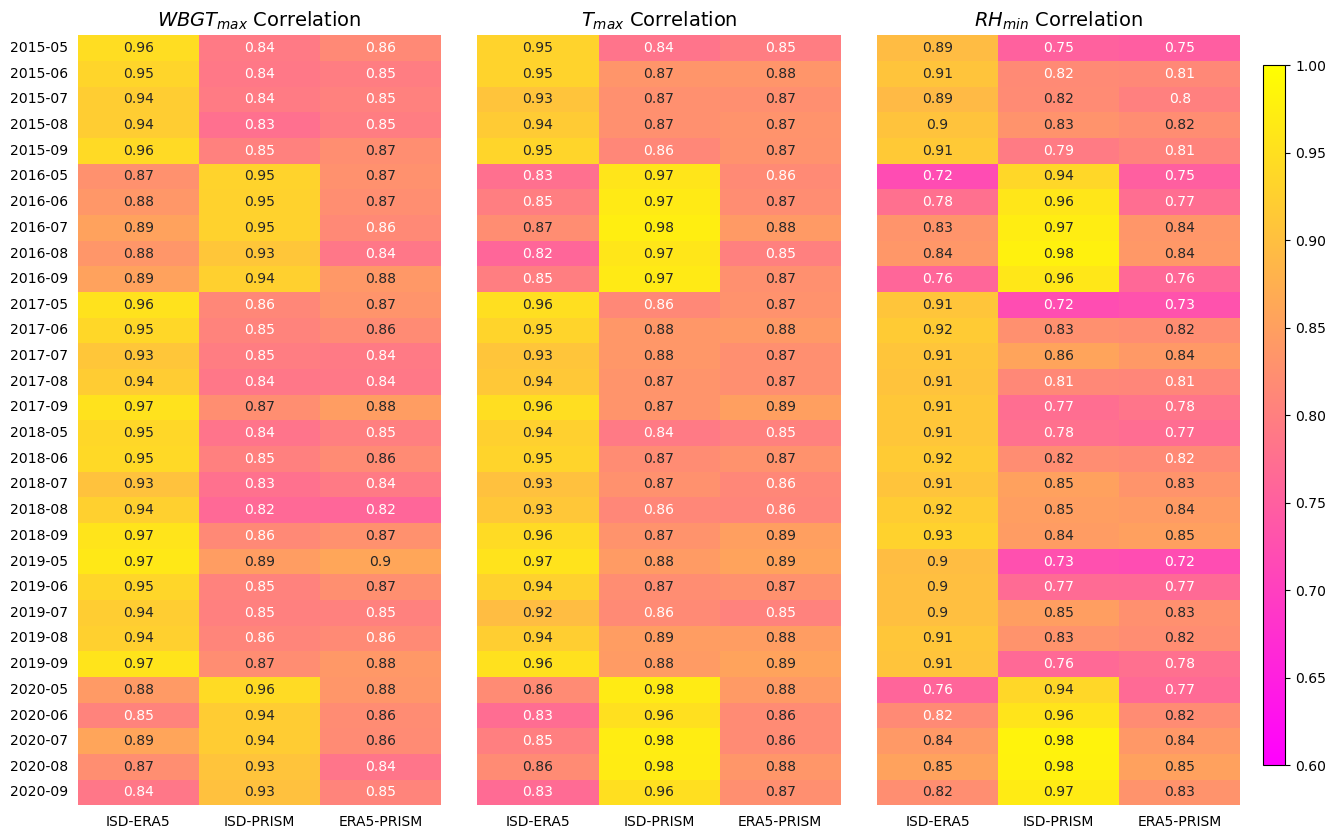

In [135]:
#ms['mathtext.default'] = 'regular' # set text to reg, not italic 

fig, axs = plt.subplots(1, 3, figsize = (15, 10), sharex=True)
ws = 0.1
fig.subplots_adjust(wspace=ws)

# bernard
sns.heatmap(bernard.iloc[:,1:], annot = True, yticklabels = out_df['Date'].values, vmin = .7, vmax = 1, 
            cmap = 'spring', ax = axs[0], cbar = False)
# ax.set(xlabel="", ylabel="")
# #ax.xaxis.tick_top()
# ax.tick_params(left=False, top=False)

# Tmax
sns.heatmap(tmax.iloc[:,1:], annot = True, yticklabels = False, cmap = 'spring', ax = axs[1], vmin = .7, vmax = 1,
           cbar = False)
# ax.set(xlabel="", ylabel="")
# #ax.xaxis.tick_top()
# ax.tick_params(left=False, top=False)


# Rhmin
sns.heatmap(rhmin.iloc[:,1:], annot = True, yticklabels = False, cmap = 'spring', ax = axs[2], vmin = .6, vmax = 1,
           cbar = False)

# Colorbar
#fig.colorbar(axs[2].get_children()[0], cax = axs[3])
cb_ax = fig.add_axes([.915, 0.15, 0.015, 0.7])
cbar = fig.colorbar(axs[2].get_children()[0], cax=cb_ax)

# labels & ticks
xlabels = ['ISD-ERA5', 'ISD-PRISM', 'ERA5-PRISM']
axs[0].tick_params(left=False, bottom = False)
axs[0].set_xticklabels(xlabels)
axs[1].tick_params(left=False, bottom = False)
axs[1].set_xticklabels(xlabels)
axs[2].tick_params(left=False, bottom = False)
axs[2].set_xticklabels(xlabels)

plt.setp(axs[0].get_xticklabels(), rotation=0, ha="center", rotation_mode="anchor")
plt.setp(axs[1].get_xticklabels(), rotation=0, ha="center", rotation_mode="anchor")
plt.setp(axs[2].get_xticklabels(), rotation=0, ha="center", rotation_mode="anchor")

# titles
axs[0].set_title(r'$WBGT_{max}$ Correlation', fontsize = 14)  #'WBGTmax Correlation'
axs[1].set_title(r'$T_{max}$ Correlation', fontsize = 14)
axs[2].set_title(r'$RH_{min}$ Correlation', fontsize = 14)

# save
fn_out = os.path.join('../../../figures/wbgtmax/S_Figure_XX_WBGT'+out+'.pdf')
plt.savefig(fn_out, dpi = 300, bbox_inches = 'tight')

plt.show()

# Other Scatter Plots

In [ ]:
data = df[(df['STN_Tmax'] > 32) & (df['date'].str.contains('2016-08'))]
len(data)

In [ ]:
# plot correlations

plot = data[['ERA5_Tmax','PRISM_Tmax','STN_Tmax']]
sns.pairplot(plot, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.05}}, corner=True)
#plt.title('Correlation between stations, ERA-5, and PRISM WBGT', fontsize = 20)

#plt.savefig('./WBGT_all_data_corr.png', bbox_inches = 'tight')

In [ ]:
# plot correlations

plot = data[['ERA5_RHmin','PRISM_RHmin','STN_RHmin']]
sns.pairplot(plot, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.05}}, corner=True)
#plt.title('Correlation between stations, ERA-5, and PRISM WBGT', fontsize = 20)

#plt.savefig('./WBGT_all_data_corr.png', bbox_inches = 'tight')

In [ ]:
# plot correlations

plot = data[['ERA5_HI','PRISM_HI','STN_HI']]
sns.pairplot(plot, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.05}}, corner=True)
#plt.title('Correlation between stations, ERA-5, and PRISM WBGT', fontsize = 20)

#plt.savefig('./WBGT_all_data_corr.png', bbox_inches = 'tight')

In [ ]:
# plot correlations

plot = data[['ERA5_Bernard','PRISM_Bernard','STN_Bernard']]
sns.pairplot(plot, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.05}}, corner=True)
#plt.title('Correlation between stations, ERA-5, and PRISM WBGT', fontsize = 20)

#plt.savefig('./WBGT_all_data_corr.png', bbox_inches = 'tight')

# Ahn et al Table 2

In [ ]:
fn_nm = os.path.join('./Table2RawData.csv')

In [ ]:
# open and look
df = pd.read_csv(fn_nm)
df.head()

In [ ]:
df.columns

In [ ]:
# look at RH on hot days
data = df[df['STN_Tmax'] >=29]
data = data[data['STN_RHmin'] >= 0] # RH < 0??? check
len(data)

In [ ]:
# plot correlations

plot = data[['STN_RHmin','ERA_RHmin','PRISM_RHmin']]
sns.pairplot(plot, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.05}}, corner=True)
#plt.title('Correlation between stations, ERA-5, and PRISM WBGT', fontsize = 20)

#plt.savefig('./WBGT_all_data_corr.png', bbox_inches = 'tight')

In [ ]:
# plot correlations

plot = data[['STN_Tmax','ERA_Tmax','PRISM_Tmax']]
sns.pairplot(plot, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.05}}, corner=True)
#plt.title('Correlation between stations, ERA-5, and PRISM WBGT', fontsize = 20)

#plt.savefig('./WBGT_all_data_corr.png', bbox_inches = 'tight')

In [ ]:
# plot correlations

plot = data[['STN_Bernard_max','ERA_Bernard_max','PRISM_Bernard_max']]
sns.pairplot(plot, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.05}}, corner=True)
#plt.title('Correlation between stations, ERA-5, and PRISM WBGT', fontsize = 20)

#plt.savefig('./WBGT_all_data_corr.png', bbox_inches = 'tight')

# bernard

In [ ]:
# file path
fn_nm = os.path.join('./dailymaxwbgt_C_Bernard.csv')

In [ ]:
# open and look
df = pd.read_csv(fn_nm)
df.head()

In [ ]:
# plot correlations

data = df.iloc[:,3:]
sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.05}}, corner=True)
#plt.title('Correlation between stations, ERA-5, and PRISM WBGT', fontsize = 20)

plt.savefig('./WBGT_all_data_corr.png', bbox_inches = 'tight')

In [ ]:
x = data['maxwbgt_C_Bernard']
y = data['ERA5_WBGT_C_Bernard']

r, p = sp.stats.pearsonr(x, y)
print('ERA - ', 'r:', r, 'p:', p)

x = data['maxwbgt_C_Bernard']
y = data['PRISM_maxwbgt_C_Bernard']

r, p = sp.stats.pearsonr(x, y)
print('ERA - ', 'r:', r, 'p:', p)

In [ ]:
# plot correlations

# NOTE: DOES ROBBIE USE >28 or >=28 ... ask him!

data = df.iloc[:,3:]
data = data[data['maxwbgt_C_Bernard'] >= 27]
sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.05}}, corner=True)
plt.savefig('./WBGT_27C_data_corr.png', bbox_inches = 'tight')

In [ ]:
data

In [ ]:
x = data['maxwbgt_C_Bernard']
y = data['ERA5_WBGT_C_Bernard']

r, p = sp.stats.pearsonr(x, y)
print('ERA - ', 'r:', r, 'p:', p)

x = data['maxwbgt_C_Bernard']
y = data['PRISM_maxwbgt_C_Bernard']

r, p = sp.stats.pearsonr(x, y)
print('ERA - ', 'r:', r, 'p:', p)

In [ ]:
df[(df['maxwbgt_C_Bernard'] > 28) & (df['PRISM_maxwbgt_C_Bernard'] > 27)]

In [ ]:
data = df[df['maxwbgt_C_Bernard'] > 28]
print(len(data))
data = data.iloc[:,3:]

plt.scatter(data['maxwbgt_C_Bernard'], data['PRISM_maxwbgt_C_Bernard'], alpha = 0.1)
plt.xlabel('Station')
plt.ylabel('PRISM')

In [ ]:
data = df[(df['maxwbgt_C_Bernard'] > 28) & (df['PRISM_maxwbgt_C_Bernard'] > 27)]
print(len(data))
data = data.iloc[:,3:]

plt.scatter(data['maxwbgt_C_Bernard'], data['PRISM_maxwbgt_C_Bernard'], alpha = 0.1)
plt.xlabel('Station')
plt.ylabel('PRISM')